In [3]:
import pandas as pd
import numpy as np
import cv2
import glob
# import imutils
# from imutils import paths
import os
import os.path
%matplotlib inline 
import matplotlib.pyplot as plt
import os

HRWY.png
HRWY


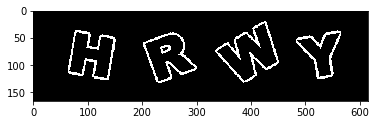

In [4]:
captcha_image='data/train/HRWY.png'
gray = cv2.imread(captcha_image)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)

filename = os.path.basename(captcha_image)
print(filename)
captcha_text = os.path.splitext(filename)[0]
print(captcha_text)
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]
# thresh = cv2.threshold(gray, 127, 255,0,cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
morph_img = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh,cmap='gray')

In [5]:
letter_image_regions = []
# finding the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
print(len(contours))
# print(len(hierarchy))
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    print(x,y,w,h)
    if w / h > 1.25 and w*h>(50)*(50):
    # Split it in half into two letter regions
        half_width = int(w / 2)
        letter_image_regions.append((x, y, half_width, h))
        letter_image_regions.append((x + half_width, y, half_width, h))
    else:
        letter_image_regions.append((x, y, w, h))
# cv2.drawContours(thresh, contours, -1, (0,255,0), 3)
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
print(len(letter_image_regions))
print(letter_image_regions)

4
203 41 98 93
483 37 84 89
64 37 88 91
335 20 117 113
4
[(64, 37, 88, 91), (203, 41, 98, 93), (335, 20, 117, 113), (483, 37, 84, 89)]


0


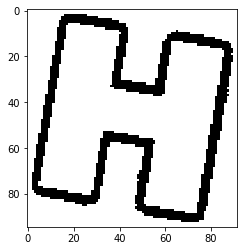

1


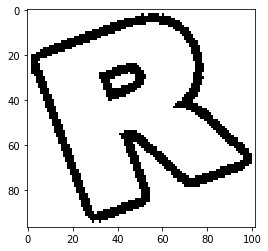

2


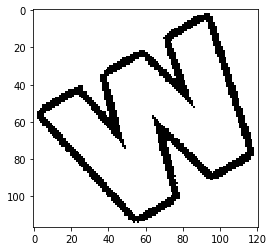

3


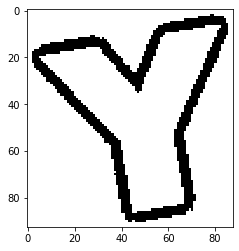

In [6]:
i=0
for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_text):
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box
#     letter_image = gray[y :y + h , x :x + w ]
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]
    print(i)
    i=i+1
    plt.imshow(letter_image,cmap='gray')
    plt.show()

In [7]:
SOLVED_CAPTCHA_FOLDER = 'data/train'
OUTPUT_FOLDER = "segmented_images"


# Get the path of all the solved captcha images
solved_captchas = glob.glob(os.path.join(SOLVED_CAPTCHA_FOLDER, "*"))
counts = {}

# loop over the image paths
for (i, captcha) in enumerate(solved_captchas):
    print("processing image {}/{}".format(i + 1, len(solved_captchas)))

    
    # grab the base filename as the text
    filename = os.path.basename(captcha)
    captcha_text = os.path.splitext(filename)[0]

    # Load the image and convert it to grayscale
    image = cv2.imread(captcha)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # applying threshold
    thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

     # finding the contours
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

    # creating empty list for holding the coordinates of the letters
    letter_image_regions = []

    # Now we will loop through each of the contours and extract the letter
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        # checking if any counter is too wide
        # if countour is too wide then there could be two letters joined together or are very close to each other
        if w / h > 1.25:
            # Split it in half into two letter regions
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            letter_image_regions.append((x, y, w, h))
    
    # Sort the detected letter images based on the x coordinate to make sure
    # we get them from left-to-right so that we match the right image with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    
    # Save each letter as a single image
    for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_text):
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]


        # Get the folder to save the image in
        save_path = os.path.join(OUTPUT_FOLDER, letter_text)

        # creating different output folder for storing different letters
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        # write the letter image to a file
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count)))
        cv2.imwrite(p, letter_image)

        # increment the count
        counts[letter_text] = count + 1


processing image 1/1820
processing image 2/1820
processing image 3/1820
processing image 4/1820
processing image 5/1820
processing image 6/1820
processing image 7/1820
processing image 8/1820
processing image 9/1820
processing image 10/1820
processing image 11/1820
processing image 12/1820
processing image 13/1820
processing image 14/1820
processing image 15/1820
processing image 16/1820
processing image 17/1820
processing image 18/1820
processing image 19/1820
processing image 20/1820
processing image 21/1820
processing image 22/1820
processing image 23/1820
processing image 24/1820
processing image 25/1820
processing image 26/1820
processing image 27/1820
processing image 28/1820
processing image 29/1820
processing image 30/1820
processing image 31/1820
processing image 32/1820
processing image 33/1820
processing image 34/1820
processing image 35/1820
processing image 36/1820
processing image 37/1820
processing image 38/1820
processing image 39/1820
processing image 40/1820
processin

processing image 337/1820
processing image 338/1820
processing image 339/1820
processing image 340/1820
processing image 341/1820
processing image 342/1820
processing image 343/1820
processing image 344/1820
processing image 345/1820
processing image 346/1820
processing image 347/1820
processing image 348/1820
processing image 349/1820
processing image 350/1820
processing image 351/1820
processing image 352/1820
processing image 353/1820
processing image 354/1820
processing image 355/1820
processing image 356/1820
processing image 357/1820
processing image 358/1820
processing image 359/1820
processing image 360/1820
processing image 361/1820
processing image 362/1820
processing image 363/1820
processing image 364/1820
processing image 365/1820
processing image 366/1820
processing image 367/1820
processing image 368/1820
processing image 369/1820
processing image 370/1820
processing image 371/1820
processing image 372/1820
processing image 373/1820
processing image 374/1820
processing i

processing image 677/1820
processing image 678/1820
processing image 679/1820
processing image 680/1820
processing image 681/1820
processing image 682/1820
processing image 683/1820
processing image 684/1820
processing image 685/1820
processing image 686/1820
processing image 687/1820
processing image 688/1820
processing image 689/1820
processing image 690/1820
processing image 691/1820
processing image 692/1820
processing image 693/1820
processing image 694/1820
processing image 695/1820
processing image 696/1820
processing image 697/1820
processing image 698/1820
processing image 699/1820
processing image 700/1820
processing image 701/1820
processing image 702/1820
processing image 703/1820
processing image 704/1820
processing image 705/1820
processing image 706/1820
processing image 707/1820
processing image 708/1820
processing image 709/1820
processing image 710/1820
processing image 711/1820
processing image 712/1820
processing image 713/1820
processing image 714/1820
processing i

processing image 1038/1820
processing image 1039/1820
processing image 1040/1820
processing image 1041/1820
processing image 1042/1820
processing image 1043/1820
processing image 1044/1820
processing image 1045/1820
processing image 1046/1820
processing image 1047/1820
processing image 1048/1820
processing image 1049/1820
processing image 1050/1820
processing image 1051/1820
processing image 1052/1820
processing image 1053/1820
processing image 1054/1820
processing image 1055/1820
processing image 1056/1820
processing image 1057/1820
processing image 1058/1820
processing image 1059/1820
processing image 1060/1820
processing image 1061/1820
processing image 1062/1820
processing image 1063/1820
processing image 1064/1820
processing image 1065/1820
processing image 1066/1820
processing image 1067/1820
processing image 1068/1820
processing image 1069/1820
processing image 1070/1820
processing image 1071/1820
processing image 1072/1820
processing image 1073/1820
processing image 1074/1820
p

processing image 1390/1820
processing image 1391/1820
processing image 1392/1820
processing image 1393/1820
processing image 1394/1820
processing image 1395/1820
processing image 1396/1820
processing image 1397/1820
processing image 1398/1820
processing image 1399/1820
processing image 1400/1820
processing image 1401/1820
processing image 1402/1820
processing image 1403/1820
processing image 1404/1820
processing image 1405/1820
processing image 1406/1820
processing image 1407/1820
processing image 1408/1820
processing image 1409/1820
processing image 1410/1820
processing image 1411/1820
processing image 1412/1820
processing image 1413/1820
processing image 1414/1820
processing image 1415/1820
processing image 1416/1820
processing image 1417/1820
processing image 1418/1820
processing image 1419/1820
processing image 1420/1820
processing image 1421/1820
processing image 1422/1820
processing image 1423/1820
processing image 1424/1820
processing image 1425/1820
processing image 1426/1820
p

processing image 1730/1820
processing image 1731/1820
processing image 1732/1820
processing image 1733/1820
processing image 1734/1820
processing image 1735/1820
processing image 1736/1820
processing image 1737/1820
processing image 1738/1820
processing image 1739/1820
processing image 1740/1820
processing image 1741/1820
processing image 1742/1820
processing image 1743/1820
processing image 1744/1820
processing image 1745/1820
processing image 1746/1820
processing image 1747/1820
processing image 1748/1820
processing image 1749/1820
processing image 1750/1820
processing image 1751/1820
processing image 1752/1820
processing image 1753/1820
processing image 1754/1820
processing image 1755/1820
processing image 1756/1820
processing image 1757/1820
processing image 1758/1820
processing image 1759/1820
processing image 1760/1820
processing image 1761/1820
processing image 1762/1820
processing image 1763/1820
processing image 1764/1820
processing image 1765/1820
processing image 1766/1820
p

(6382, 120, 120, 1)
(6382, 120, 120, 1)


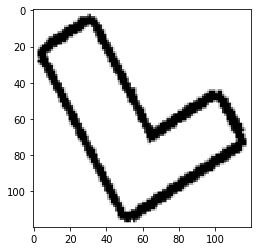

In [9]:
letter_folder = 'segmented_images'
import imutils
from imutils import paths
#creating empty lists for storing image data and labels
data = []
labels = []
for image in paths.list_images(letter_folder):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (120,120))
    imag=img
    # adding a 3rd dimension to the image
    img = np.expand_dims(img, axis = 2)
    
    #grabing the name of the letter based on the folder it is present in
    label = image.split(os.path.sep)[-2]
    
    # appending to the empty lists
    data.append(img)
    labels.append(label)

#converting data and labels to np array
data = np.array(data, dtype = "float")
print(data.shape)
labels = np.array(labels)
print(data.shape)
plt.imshow(imag,cmap='gray')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
(train_x, val_x, train_y, val_y) = train_test_split(data, labels, test_size=0.2, random_state=0)

#one hot encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer().fit(train_y)
print(lb)
train_y = lb.transform(train_y)
val_y = lb.transform(val_y)
print(train_y[0])
print(val_y[0])


LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

#building model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(120, 120, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(26, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# using early stoping for avoiding overfitting
estop = EarlyStopping(patience=10, mode='min', min_delta=0.001, monitor='val_loss')

model.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=32, epochs=50, verbose=1, callbacks = [estop])

Train on 5105 samples, validate on 1277 samples
Epoch 1/50
5105/5105 [==============================] - 46s 9ms/step - loss: 2.7183 - accuracy: 0.8239 - val_loss: 0.0706 - val_accuracy: 0.9922
Epoch 2/50
5105/5105 [==============================] - 45s 9ms/step - loss: 0.0938 - accuracy: 0.9861 - val_loss: 0.0578 - val_accuracy: 0.9922
Epoch 3/50
5105/5105 [==============================] - 45s 9ms/step - loss: 0.0890 - accuracy: 0.9867 - val_loss: 0.0887 - val_accuracy: 0.9922
Epoch 4/50
5105/5105 [==============================] - 47s 9ms/step - loss: 0.0781 - accuracy: 0.9853 - val_loss: 0.0593 - val_accuracy: 0.9922
Epoch 5/50
5105/5105 [==============================] - 46s 9ms/step - loss: 0.0849 - accuracy: 0.9881 - val_loss: 0.0645 - val_accuracy: 0.9875
Epoch 6/50
5105/5105 [==============================] - 46s 9ms/step - loss: 0.0872 - accuracy: 0.9879 - val_loss: 0.0662 - val_accuracy: 0.9867
Epoch 7/50
5105/5105 [==============================] - 45s 9ms/step - loss: 0.060

In [ ]:
# Load the image and convert it to grayscale
image = cv2.imread('data/validation/OZLS.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

# threshold the image
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

# find the contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    
letter_image_regions = []

# Now we can loop through each of the contours and extract the letter

for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    
    # checking if any counter is too wide
    # if countour is too wide then there could be two letters joined together or are very close to each other
    if w / h > 1.25:
        # Split it in half into two letter regions
        half_width = int(w / 2)
        letter_image_regions.append((x, y, half_width, h))
        letter_image_regions.append((x + half_width, y, half_width, h))
    else:
        letter_image_regions.append((x, y, w, h))
            

# Sort the detected letter images based on the x coordinate to make sure
# we get them from left-to-right so that we match the right image with the right letter  

letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Create an output image and a list to hold our predicted letters
output = cv2.merge([gray] * 3)
predictions = []
    
# Creating an empty list for storing predicted letters
predictions = []
    
# Save out each letter as a single image
for letter_bounding_box in letter_image_regions:
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

    # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

    letter_image = cv2.resize(letter_image, (120,120))
        
    # Turn the single image into a 4d list of images
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)

    # making prediction
    pred = model.predict(letter_image)
        
    # Convert the one-hot-encoded prediction back to a normal letter
    letter = lb.inverse_transform(pred)[0]
    predictions.append(letter)


    # draw the prediction on the output image
    cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
    cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)

# Print the captcha's text
captcha_text = "".join(predictions)
print("CAPTCHA text is: {}".format(captcha_text))

# Show the annotated image
cv2.imshow('output',output)
cv2.waitKey(0)